# Importing library

In [1]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Importing dataset

In [2]:
from sklearn import datasets
boston = datasets.load_boston()

df = pd.DataFrame(boston.data, columns=boston.feature_names)
df['Price'] = boston.target
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,Price
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


# Analysing data

## Heatmap

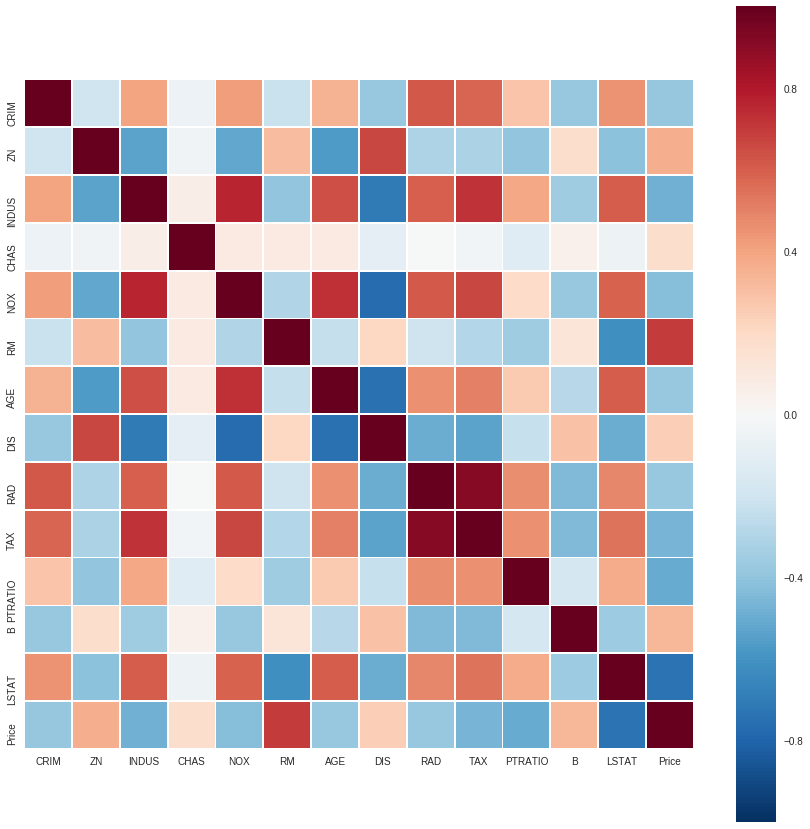

In [3]:
plt.figure(figsize=(15,15))
sns.heatmap(df.corr(), linewidths=0.8, square=True)

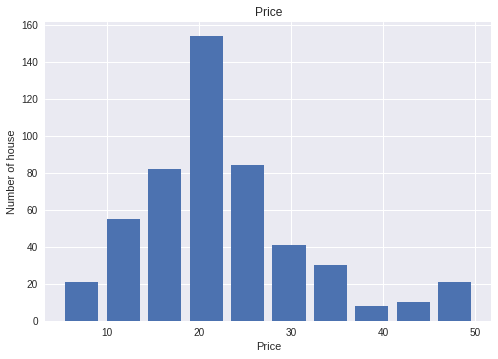

In [4]:
plt.hist(df['Price'], rwidth=0.8, bins=10)
plt.title('Price')
plt.xlabel('Price')
plt.ylabel('Number of house')
plt.show()

# Preprocessing

In [5]:
X = df.drop(['Price'], axis=1)
y = df['Price']

from sklearn.preprocessing import MinMaxScaler
minmaxscaler = MinMaxScaler()
X = minmaxscaler.fit_transform(X)

# Training and testing model

In [6]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3)

## Linear Regression

In [7]:
from sklearn.linear_model import LinearRegression
clf = LinearRegression()
clf = clf.fit(X_train, y_train)

In [8]:
print("Train score", clf.score(X_train, y_train))
print("Test score:", clf.score(X_test, y_test))

Train score 0.740653281705
Test score: 0.733195394445


### Observing weight of different features

In [9]:
pd.DataFrame(clf.coef_, index=boston.feature_names)

,0
CRIM,-9.621890
ZN,6.073811
INDUS,1.647444
CHAS,2.355737
NOX,-8.583924
RM,18.485103
AGE,-0.404126
DIS,-17.140120
RAD,6.717352
TAX,-5.920692


[]

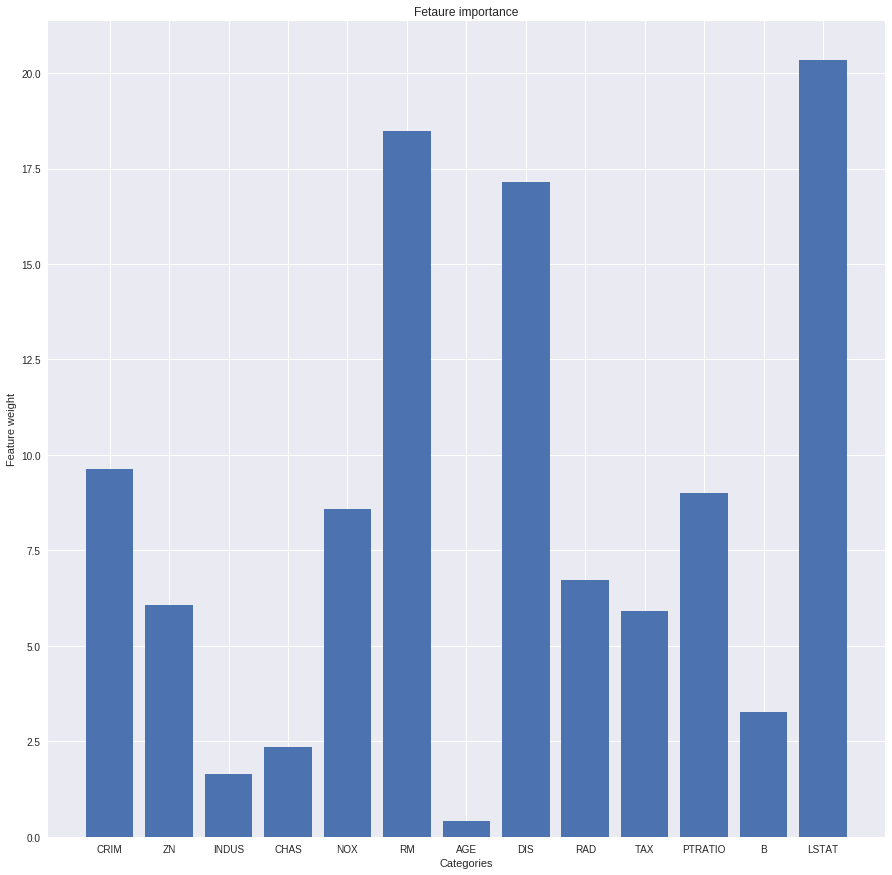

In [10]:
plt.figure(figsize=(15,15))
plt.bar(np.arange(13), np.absolute(clf.coef_), tick_label=boston.feature_names)
plt.xlabel('Categories')
plt.ylabel('Feature weight')
plt.title('Fetaure importance')
plt.plot()

As we can see RM (Room per dwelling), DIS (Distance from employment centers) and LSTAT (Percentage lower status of the population) are most important features.

## Decision Tree Regressor

In [11]:
from sklearn.tree import DecisionTreeRegressor
clf = clf = DecisionTreeRegressor()
clf.fit(X_train, y_train)

DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
           max_leaf_nodes=None, min_impurity_split=1e-07,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, presort=False, random_state=None,
           splitter='best')

In [12]:
print("Train score:", clf.score(X_train, y_train))
print("Test score:", clf.score(X_test, y_test))

Train score: 1.0
Test score: 0.747180072533


## SVM

In [13]:
from sklearn.svm import LinearSVR
clf = LinearSVR()
clf.fit(X_train, y_train)

LinearSVR(C=1.0, dual=True, epsilon=0.0, fit_intercept=True,
     intercept_scaling=1.0, loss='epsilon_insensitive', max_iter=1000,
     random_state=None, tol=0.0001, verbose=0)

In [14]:
print("Train score:", clf.score(X_train, y_train))
print("Test score:", clf.score(X_test, y_test))

Train score: 0.617236764575
Test score: 0.58344332285


## Conclusion

Decision Tree outperforms Linear Regression and SVM.